# QAI Qiskit Workshop: Introduction

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

In [2]:
# Other useful imports

import numpy as np

## Setting up Qiskit Runtime

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="MY_IBM_QUANTUM_TOKEN")

In [5]:
service = QiskitRuntimeService(channel="ibm_quantum", instance='pinq-quebec-hub/internal/main')

# Basic circuit

Goal: flip the state of a target qubit based on the state of another control qubit

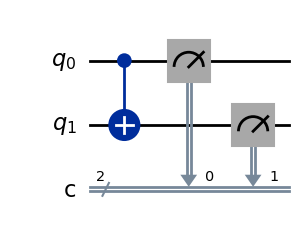

In [6]:
# Create CNOT circuit
cnot_circ = QuantumCircuit(2,2)

# Comment out the next line to see what happens when the input is left as |0>
#cnot_circ.x(0)

# Comment out the next line to see what happens when the target is left as |0>
#cnot_circ.x(1)

# Apply CNOT, then measure
cnot_circ.cx(0,1)
cnot_circ.measure([0,1],[0,1])

cnot_circ.draw()

In [7]:
# Create a simulator instance. This helps to verify the circuit before running on real hardware. Note that this only works for small circuit.
sim_backend = AerSimulator()


In [8]:
# Run CNOT circuit
job = sim_backend.run(cnot_circ)
counts = job.result().get_counts()
counts

{'00': 1024}

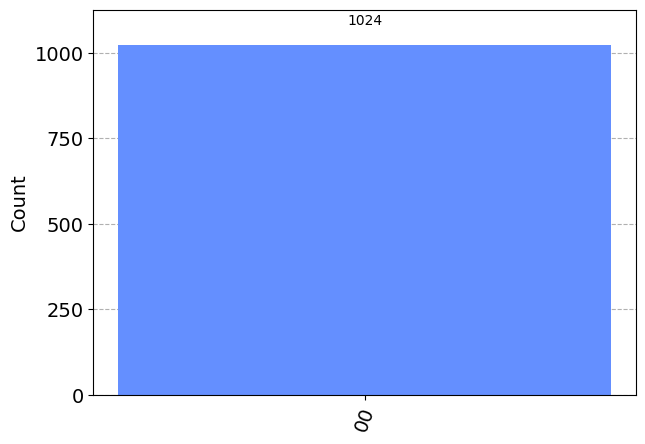

In [9]:
# Plot histogram of results
plot_histogram(counts)

# Slightly more advanced circuit: Bell state (entanglement)

Goal: Create the $\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$ entangled state

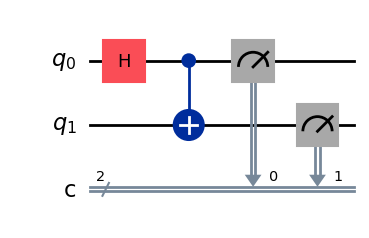

In [10]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [11]:
job = sim_backend.run(bell_circ)
bell_counts = job.result().get_counts()
bell_counts

{'11': 501, '00': 523}

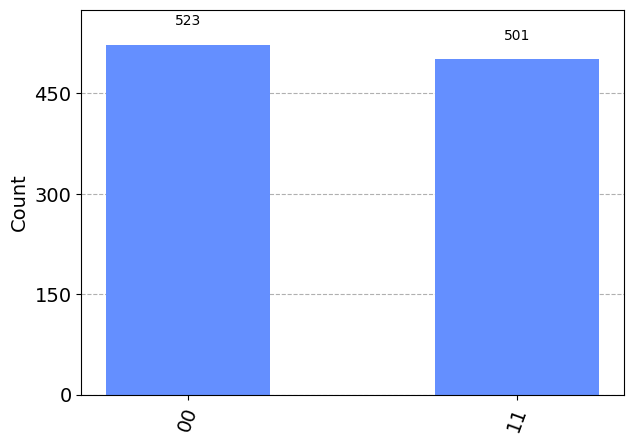

In [12]:
plot_histogram(bell_counts)

# Running on a real quantum computer

In [13]:
service.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_quebec')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [18]:
# Find the least busy system that has at least 2 qubits...
backend = service.get_backend('ibm_quebec')

print(backend)

<IBMBackend('ibm_quebec')>


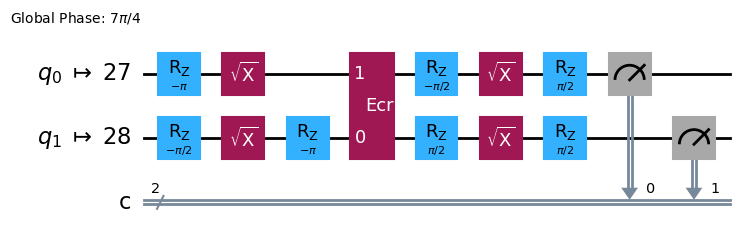

In [24]:
# Transpile the circuit before running on the reall quantum hardware

bell_circ_t = transpile(bell_circ, backend, optimization_level=2)
bell_circ_t.draw(idle_wires=False)

In [25]:
# Run the circuit
job_ibmq = backend.run(bell_circ_t, shots=1024)

In [44]:
# Get job status
print(job_ibmq.status())

JobStatus.QUEUED


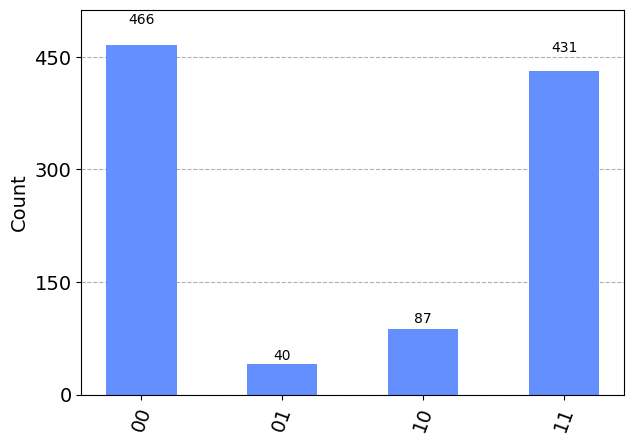

In [31]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
result = job_ibmq.result()
counts = result.get_counts()
plot_histogram(counts)

## Verifying circuits with local testing mode

In [28]:
from qiskit_ibm_runtime.fake_provider import FakeQuebec

fake_quebec_backend = FakeQuebec()

In [33]:
bell_circ_t_fake = transpile(bell_circ, fake_quebec_backend)
job_fake = fake_quebec_backend.run(bell_circ_t_fake)

In [34]:
result = job_fake.result()
counts = result.get_counts()
counts

{'01': 26, '11': 509, '10': 17, '00': 472}

In [39]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version

print("Qiskit version:", qiskit_version)
print("Qiskit Runtime version:", runtime_version)

Qiskit version: 1.0.2
Qiskit Runtime version: 0.22.0
